La violencia física contra niños es un problema global con altos niveles de subregistro, lo que dificulta la implementación de intervenciones oportunas. En Argentina, la Encuesta de Indicadores Múltiples por Conglomerados (MICS) 2019-2020 de UNICEF reveló que más del 59% de los niños menores de 15 años experimentó algún tipo de violencia disciplinaria en sus hogares. Dado que la detección temprana suele depender de denuncias, este estudio busca aplicar técnicas de aprendizaje automático para predecir el riesgo de violencia infantil a nivel de hogar. En particular, se replican los análisis del trabajo Machine Learning and Public Policy: Early Detection of Physical Violence Against Children (Edo, Oubiña y Svarc), evaluando la capacidad de distintos modelos de clasificación para identificar hogares en situación de riesgo y contribuir al diseño de políticas públicas más eficaces en la protección de la infancia.

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestClassifier  # Para el modelo de Random Forest
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score  # Para calcular las métricas de evaluación
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix  # Para calcular la matriz de confusión
from sklearn.svm import SVC




In [ ]:
df = pd.read_csv('/content/train.txt', delimiter=" ")

In [ ]:
df.head()

,HH5Y,HH12C,HH48,HH49,HH53,HH55,HH56,HC3,HC11A,HC20A,...,MT11_any,wm_noit_any,wm_now_married_un_any,wm_prev_married_un_any,wm_married_un_any,mother_now_married_un_any,mother_prev_married_un_any,mother_married_un_any,mother_married_un_mt_any,violence
1,2019,1,3,1,1,1,1,1,1,0,...,0,0,0,1,1,0,1,1,1,1
2,2019,1,4,1,1,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
3,2020,1,6,1,1,2,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2020,1,2,1,1,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,1
5,2020,3,2,1,1,0,1,1,0,0,...,0,0,0,1,1,0,1,1,0,0


In [ ]:
df.shape

(5150, 644)

In [ ]:
print(f'El dataframe tiene {df.shape[0]} filas')
print(f'El dataframe tiene {df.shape[1]} columnas')

El dataframe tiene 5150 filas
El dataframe tiene 644 columnas


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5150 entries, 1 to 7357
Columns: 644 entries, HH5Y to violence
dtypes: float64(55), int64(589)
memory usage: 25.3 MB


In [ ]:
null_columns = df.isnull().sum()
null_columns[null_columns > 0]


,0


In [ ]:

X = df.drop('violence', axis=1)
y = df['violence']



In [ ]:
df_test = pd.read_csv('/content/test.txt', delimiter=" ")

In [ ]:
df_test = pd.read_csv('/content/test.txt', delimiter=" ")

In [ ]:
X_test= df_test.drop('violence', axis=1)
y_test = df_test['violence']  #

In [ ]:
X_test.head()

,HH5Y,HH12C,HH48,HH49,HH53,HH55,HH56,HC3,HC11A,HC20A,...,MT9_any,MT11_any,wm_noit_any,wm_now_married_un_any,wm_prev_married_un_any,wm_married_un_any,mother_now_married_un_any,mother_prev_married_un_any,mother_married_un_any,mother_married_un_mt_any
6,2020,1,3,1,1,0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
11,2019,1,5,1,1,1,0,2,0,1,...,0,0,0,0,0,0,0,0,0,0
12,2020,1,4,1,1,1,1,1,1,1,...,0,0,0,1,0,1,1,0,1,1
14,2020,1,5,2,2,0,1,1,1,0,...,0,0,0,1,0,1,1,0,1,0
16,2020,1,10,3,2,1,1,2,0,1,...,0,0,0,0,0,0,0,0,0,0


# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold


# Definimos los hiperparámetros a probar
param_grid = {
    'n_estimators': [50, 100, 200],  # Número de árboles en el bosque
    'max_depth': [10, 20, 30, None],  # Profundidad máxima del árbol
    'min_samples_split': [2, 5, 10]  # Número mínimo de muestras para dividir un nodo
}

kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Creamos el modelo de Random Forest
rf_model = RandomForestClassifier(random_state=42)

# Configuramos GridSearchCV con K-Fold Cross-Validation
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=kf, scoring='accuracy', n_jobs=-1)

# Ajustamos el modelo en los datos de entrenamiento
grid_search.fit(X, y)

# Imprimimos los mejores hiperparámetros encontrados
print(f"Mejores hiperparámetros: {grid_search.best_params_}")

# Entrenamos el modelo final con los mejores hiperparámetros encontrados
best_rf_model = grid_search.best_estimator_


Mejores hiperparámetros: {'max_depth': None, 'min_samples_split': 10, 'n_estimators': 200}


In [ ]:
# Obtenemos la importancia de las características
feature_importance_rf = pd.DataFrame({
    'Feature': X.columns,
    'Importance': best_rf_model.feature_importances_
})

# Ordenamos las características por importancia
feature_importance_rf = feature_importance_rf.sort_values(by='Importance', ascending=False)

# Mostramos las 20 características más importantes
print("Las 20 características más importantes según Random Forest:")
print(feature_importance_rf.head(20))


Las 20 características más importantes según Random Forest:
                   Feature  Importance
23                  wscore    0.021304
284               edad_avg    0.018178
328            edu_adultos    0.015713
22                   HHAGE    0.014128
286       edad_ninios_0a17    0.013613
327        edu_padre_madre    0.013049
287       edad_ninios_1a14    0.013031
285       edad_ninios_5a17    0.010733
279            varones_pct    0.010387
330      nivel_edu_adultos    0.009908
336          transfers_pct    0.009899
329  nivel_edu_padre_madre    0.008626
340  noconsultamed_u3m_sum    0.007941
531   contracep_unkown_sum    0.007913
517   endorse_violence_any    0.007589
288          edad_otros_ad    0.007459
347          empleados_pct    0.007131
334    cobertura_salud_pct    0.006608
2                     HH48    0.006328
407          libros_fs_avg    0.006073


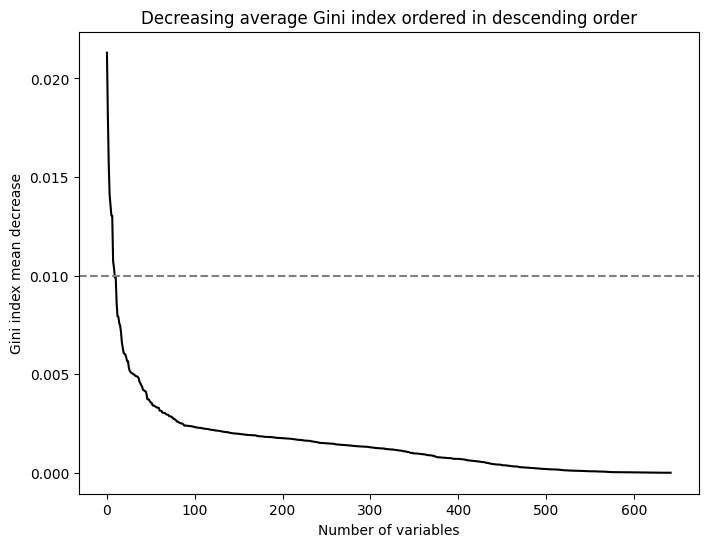

In [ ]:
import matplotlib.pyplot as plt

# Importancia de características acumulada (ordenada)
gini_importance = feature_importance_rf['Importance'].values

# Creamos el gráfico
plt.figure(figsize=(8,6))
plt.plot(range(len(gini_importance)), gini_importance, color='black')
plt.axhline(y=0.01, color='gray', linestyle='--')
plt.title('Decreasing average Gini index ordered in descending order')
plt.xlabel('Number of variables')
plt.ylabel('Gini index mean decrease')
plt.show()


In [ ]:
top_50_features_rf = feature_importance_rf['Feature'].head(50).values
pd.DataFrame(top_50_features_rf, columns=['Feature']).to_csv('top_50_features_rf.csv', index=False)


In [ ]:

# Seleccionamos las 50 características más importantes
top_50_features_rf = feature_importance_rf['Feature'].head(50).values

# Reducimos el conjunto de datos a estas 50 variables
X_reduced_rf = X[top_50_features_rf]
X_test_reduced_rf = X_test[top_50_features_rf]

# Entrenamos nuevamente el modelo de Random Forest con las 50 características seleccionadas
best_rf_model.fit(X_reduced_rf, y)

# Hacemos las predicciones en el conjunto de prueba con las 50 características
y_pred_reduced_rf = best_rf_model.predict(X_test_reduced_rf)

# Calculamos las métricas de evaluación
accuracy_reduced_rf = accuracy_score(y_test, y_pred_reduced_rf)
precision_reduced_rf = precision_score(y_test, y_pred_reduced_rf)
recall_reduced_rf = recall_score(y_test, y_pred_reduced_rf)
f1_reduced_rf = f1_score(y_test, y_pred_reduced_rf)
roc_auc_reduced_rf = roc_auc_score(y_test, best_rf_model.predict_proba(X_test_reduced_rf)[:, 1])

# Mostramos las métricas de evaluación
print(f"Precisión (Accuracy): {accuracy_reduced_rf:.4f}")
print(f"Precisión (Precision): {precision_reduced_rf:.4f}")
print(f"Sensibilidad (Recall): {recall_reduced_rf:.4f}")
print(f"F1 Score: {f1_reduced_rf:.4f}")
print(f"ROC AUC: {roc_auc_reduced_rf:.4f}")


Precisión (Accuracy): 0.6271
Precisión (Precision): 0.5967
Sensibilidad (Recall): 0.4126
F1 Score: 0.4879
ROC AUC: 0.6543


In [ ]:


X_reduced_rf.to_csv('50featurestrain.csv',index=False)
X_test_reduced_rf.to_csv('50featurestest.csv',index=False)

In [ ]:

# Obtenemos las probabilidades de predicción del modelo para la clase positiva
y_prob_rf = best_rf_model.predict_proba(X_test_reduced_rf)[:, 1]

# Calculamos la sensibilidad (tpr), la tasa de falsos positivos (fpr) y los umbrales
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_prob_rf)

# Calculamos la especificidad para cada umbral (1 - fpr)
specificity_rf = 1 - fpr_rf

# Calculamos el Índice de Youden (J) para cada umbral
youden_index_rf = tpr_rf + specificity_rf - 1

# Encontramos el umbral que maximiza el Índice de Youden
best_threshold_rf_index = np.argmax(youden_index_rf)
best_threshold_rf = thresholds_rf[best_threshold_rf_index]

# Mostramos el umbral óptimo
print(f"El mejor umbral según el Índice de Youden es: {best_threshold_rf:.4f}")

# También mostramos la sensibilidad y especificidad correspondientes al mejor umbral
print(f"Sensibilidad en el mejor umbral: {tpr_rf[best_threshold_rf_index]:.4f}")
print(f"Especificidad en el mejor umbral: {specificity_rf[best_threshold_rf_index]:.4f}")


El mejor umbral según el Índice de Youden es: 0.4212
Sensibilidad en el mejor umbral: 0.6232
Especificidad en el mejor umbral: 0.6086


In [ ]:
# Ajustamos las predicciones utilizando el nuevo umbral basado en el Índice de Youden
y_pred_rf_adjusted = (y_prob_rf >= best_threshold_rf).astype(int)

# Calculamos nuevamente las métricas con el nuevo umbral
accuracy_rf_adjusted = accuracy_score(y_test, y_pred_rf_adjusted)
precision_rf_adjusted = precision_score(y_test, y_pred_rf_adjusted)
recall_rf_adjusted = recall_score(y_test, y_pred_rf_adjusted)
f1_rf_adjusted = f1_score(y_test, y_pred_rf_adjusted)
roc_auc_rf_adjusted = roc_auc_score(y_test, y_prob_rf)

# Mostramos las métricas de evaluación ajustadas
print(f"Precisión (Accuracy): {accuracy_rf_adjusted:.4f}")
print(f"Precisión (Precision): {precision_rf_adjusted:.4f}")
print(f"Sensibilidad (Recall): {recall_rf_adjusted:.4f}")
print(f"F1 Score: {f1_rf_adjusted:.4f}")
print(f"ROC AUC: {roc_auc_rf_adjusted:.4f}")


Precisión (Accuracy): 0.6149
Precisión (Precision): 0.5461
Sensibilidad (Recall): 0.6232
F1 Score: 0.5821
ROC AUC: 0.6543


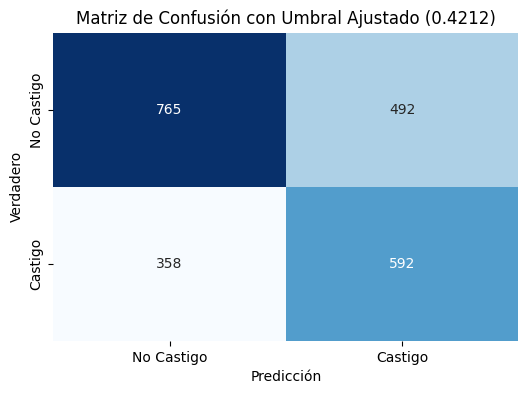

Matriz de Confusión (Umbral Ajustado):
[[765 492]
 [358 592]]


In [ ]:
# Ajustamos las predicciones utilizando el nuevo umbral basado en el Índice de Youden
y_pred_rf_adjusted = (y_prob_rf >= best_threshold_rf).astype(int)

# Calculamos la nueva matriz de confusión
conf_matrix_rf_adjusted = confusion_matrix(y_test, y_pred_rf_adjusted)

# Visualizamos la nueva matriz de confusión
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix_rf_adjusted, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No Castigo', 'Castigo'], yticklabels=['No Castigo', 'Castigo'])
plt.xlabel('Predicción')
plt.ylabel('Verdadero')
plt.title(f'Matriz de Confusión con Umbral Ajustado ({best_threshold_rf:.4f})')
plt.show()

# Imprimimos la nueva matriz de confusión en formato de texto para referencia
print(f"Matriz de Confusión (Umbral Ajustado):\n{conf_matrix_rf_adjusted}")


# SVM

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Definimos una grilla reducida de hiperparámetros
param_dist_svm = {
    'C': np.logspace(-2, 1, 4),  # Valores de C menores que 10
    'gamma': np.logspace(-2, 1, 4),  # Valores de gamma menores que 10
    'kernel': ['rbf'],  # Probamos solo con kernel radial
}

# Creamos el modelo de SVM
svm_model = SVC(probability=True, random_state=42)

# Usamos RandomizedSearchCV con K-Fold Cross-Validation
random_search_svm = RandomizedSearchCV(estimator=svm_model, param_distributions=param_dist_svm,
                                       cv=5, scoring='accuracy', n_jobs=-1, n_iter=10, random_state=42)

# Ajustamos el modelo en el conjunto de datos completo
random_search_svm.fit(X, y)

# Imprimimos los mejores hiperparámetros encontrados
print(f"Mejores hiperparámetros: {random_search_svm.best_params_}")


Mejores hiperparámetros: {'kernel': 'rbf', 'gamma': 0.01, 'C': 0.01}


In [ ]:

X_reduced_rf = pd.read_csv('/content/50featurestrain.csv')
X_test_reduced_rf = pd.read_csv('/content/50featurestest.csv')

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Creamos el modelo de SVM con los mejores hiperparámetros y balanceo de clases
best_svm_model_balanced = SVC(probability=True, random_state=42, class_weight='balanced',
                              kernel='rbf', gamma=0.01, C=0.01)

# Entrenamos el modelo con todas las variables
best_svm_model_balanced.fit(X, y)

# Hacemos las predicciones en el conjunto de prueba
y_pred_svm_balanced = best_svm_model_balanced.predict(X_test)

# Calculamos las métricas de evaluación con el umbral predeterminado
accuracy_svm_balanced = accuracy_score(y_test, y_pred_svm_balanced)
precision_svm_balanced = precision_score(y_test, y_pred_svm_balanced)
recall_svm_balanced = recall_score(y_test, y_pred_svm_balanced)
f1_svm_balanced = f1_score(y_test, y_pred_svm_balanced)
roc_auc_svm_balanced = roc_auc_score(y_test, best_svm_model_balanced.predict_proba(X_test)[:, 1])

# Mostramos las métricas con el umbral predeterminado
print(f"Precisión (Accuracy) con todas las variables: {accuracy_svm_balanced:.4f}")
print(f"Precisión (Precision) con todas las variables: {precision_svm_balanced:.4f}")
print(f"Sensibilidad (Recall) con todas las variables: {recall_svm_balanced:.4f}")
print(f"F1 Score con todas las variables: {f1_svm_balanced:.4f}")
print(f"ROC AUC con todas las variables: {roc_auc_svm_balanced:.4f}")

# ---- Ajustar el umbral  ----


# Obtenemos las probabilidades para la clase positiva
y_prob_svm = best_svm_model_balanced.predict_proba(X_test)[:, 1]

# Calculamos la curva ROC y los umbrales correspondientes
fpr, tpr, thresholds = roc_curve(y_test, y_prob_svm)

# Calculamos el Índice de Youden (sensibilidad + especificidad - 1)
youden_index = tpr - fpr

# Encontramos el umbral que maximiza el Índice de Youden
best_threshold = thresholds[np.argmax(youden_index)]

# Mostramos el umbral óptimo
print(f"El mejor umbral según el Índice de Youden es: {best_threshold:.4f}")

# También mostramos la sensibilidad y especificidad correspondientes al mejor umbral
print(f"Sensibilidad en el mejor umbral: {tpr[np.argmax(youden_index)]:.4f}")
print(f"Especificidad en el mejor umbral: {1 - fpr[np.argmax(youden_index)]:.4f}")

# Ajustamos las predicciones utilizando el nuevo umbral
y_pred_svm_threshold = (y_prob_svm >= best_threshold).astype(int)

# Calculamos las métricas de evaluación con el nuevo umbral
accuracy_threshold = accuracy_score(y_test, y_pred_svm_threshold)
precision_threshold = precision_score(y_test, y_pred_svm_threshold)
recall_threshold = recall_score(y_test, y_pred_svm_threshold)
f1_threshold = f1_score(y_test, y_pred_svm_threshold)
roc_auc_threshold = roc_auc_score(y_test, y_prob_svm)

# Imprimimos las métricas de evaluación
print(f"Precisión (Accuracy) con umbral óptimo: {accuracy_threshold:.4f}")
print(f"Precisión (Precision) con umbral óptimo: {precision_threshold:.4f}")
print(f"Sensibilidad (Recall) con umbral óptimo: {recall_threshold:.4f}")
print(f"F1 Score con umbral óptimo: {f1_threshold:.4f}")
print(f"ROC AUC con umbral óptimo: {roc_auc_threshold:.4f}")



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Precisión (Accuracy) con todas las variables: 0.5696
Precisión (Precision) con todas las variables: 0.0000
Sensibilidad (Recall) con todas las variables: 0.0000
F1 Score con todas las variables: 0.0000
ROC AUC con todas las variables: 0.6028
El mejor umbral según el Índice de Youden es: 0.4127
Sensibilidad en el mejor umbral: 0.7084
Especificidad en el mejor umbral: 0.4630
Precisión (Accuracy) con umbral óptimo: 0.5686
Precisión (Precision) con umbral óptimo: 0.4993
Sensibilidad (Recall) con umbral óptimo: 0.7084
F1 Score con umbral óptimo: 0.5857
ROC AUC con umbral óptimo: 0.6028


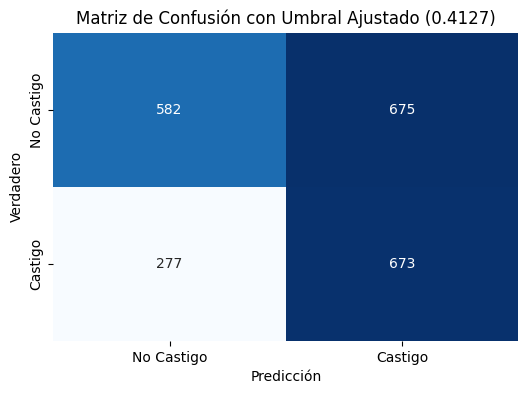

Matriz de Confusión con Umbral Ajustado:
[[582 675]
 [277 673]]


In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculamos la matriz de confusión con el umbral ajustado
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm_threshold)

# Visualizamos la matriz de confusión
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix_svm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No Castigo', 'Castigo'], yticklabels=['No Castigo', 'Castigo'])
plt.xlabel('Predicción')
plt.ylabel('Verdadero')
plt.title(f'Matriz de Confusión con Umbral Ajustado ({best_threshold:.4f})')
plt.show()

# Imprimimos la matriz de confusión en texto para referencia
print(f"Matriz de Confusión con Umbral Ajustado:\n{conf_matrix_svm}")



In [ ]:
# Creamos el modelo de SVM con los mejores hiperparámetros y balanceo de clases
best_svm_model_reduced = SVC(probability=True, random_state=42, class_weight='balanced',
                             kernel='rbf', gamma=0.01, C=0.01)

# Entrenamos el modelo SVM con las 50 mejores variables
best_svm_model_reduced.fit(X_reduced_rf, y)

# Hacemos las predicciones con las 50 mejores variables
y_pred_svm_reduced = best_svm_model_reduced.predict(X_test_reduced_rf)

# Calculamos las métricas de evaluación
accuracy_svm_reduced = accuracy_score(y_test, y_pred_svm_reduced)
precision_svm_reduced = precision_score(y_test, y_pred_svm_reduced)
recall_svm_reduced = recall_score(y_test, y_pred_svm_reduced)
f1_svm_reduced = f1_score(y_test, y_pred_svm_reduced)
roc_auc_svm_reduced = roc_auc_score(y_test, best_svm_model_reduced.predict_proba(X_test_reduced_rf)[:, 1])

# Mostramos las métricas de evaluación
print(f"Precisión (Accuracy) con las 50 variables: {accuracy_svm_reduced:.4f}")
print(f"Precisión (Precision) con las 50 variables: {precision_svm_reduced:.4f}")
print(f"Sensibilidad (Recall) con las 50 variables: {recall_svm_reduced:.4f}")
print(f"F1 Score con las 50 variables: {f1_svm_reduced:.4f}")
print(f"ROC AUC con las 50 variables: {roc_auc_svm_reduced:.4f}")



Precisión (Accuracy) con las 50 variables: 0.5768
Precisión (Precision) con las 50 variables: 0.5460
Sensibilidad (Recall) con las 50 variables: 0.1000
F1 Score con las 50 variables: 0.1690
ROC AUC con las 50 variables: 0.6007


# SVM con las 50 variables de RF

In [ ]:
from sklearn.metrics import roc_curve

# Obtenemos las probabilidades para la clase positiva usando las 50 variables
y_prob_svm_reduced = best_svm_model_reduced.predict_proba(X_test_reduced_rf)[:, 1]

# Calculamos la curva ROC y los umbrales correspondientes
fpr_reduced, tpr_reduced, thresholds_reduced = roc_curve(y_test, y_prob_svm_reduced)

# Calculamos el Índice de Youden (sensibilidad + especificidad - 1)
youden_index_reduced = tpr_reduced - fpr_reduced

# Encontramos el umbral que maximiza el Índice de Youden
best_threshold_reduced = thresholds_reduced[np.argmax(youden_index_reduced)]

# Mostramos el umbral óptimo
print(f"El mejor umbral según el Índice de Youden es: {best_threshold_reduced:.4f}")

# También mostramos la sensibilidad y especificidad correspondientes al mejor umbral
print(f"Sensibilidad en el mejor umbral: {tpr_reduced[np.argmax(youden_index_reduced)]:.4f}")
print(f"Especificidad en el mejor umbral: {1 - fpr_reduced[np.argmax(youden_index_reduced)]:.4f}\n")

# ---- Ajustamos las predicciones utilizando el nuevo umbral ----
y_pred_svm_threshold_reduced = (y_prob_svm_reduced >= best_threshold_reduced).astype(int)

# Calculamos las métricas de evaluación con el umbral ajustado
accuracy_threshold_reduced = accuracy_score(y_test, y_pred_svm_threshold_reduced)
precision_threshold_reduced = precision_score(y_test, y_pred_svm_threshold_reduced)
recall_threshold_reduced = recall_score(y_test, y_pred_svm_threshold_reduced)
f1_threshold_reduced = f1_score(y_test, y_pred_svm_threshold_reduced)
roc_auc_threshold_reduced = roc_auc_score(y_test, y_prob_svm_reduced)

# Imprimimos las métricas de evaluación
print("Métricas del modelo con umbral óptimo:\n")
print(f"Precisión (Accuracy) con umbral ajustado: {accuracy_threshold_reduced:.4f}")
print(f"Precisión (Precision) con umbral ajustado: {precision_threshold_reduced:.4f}")
print(f"Sensibilidad (Recall) con umbral ajustado: {recall_threshold_reduced:.4f}")
print(f"F1 Score con umbral ajustado: {f1_threshold_reduced:.4f}")
print(f"ROC AUC con umbral ajustado: {roc_auc_threshold_reduced:.4f}")


El mejor umbral según el Índice de Youden es: 0.4095
Sensibilidad en el mejor umbral: 0.6053
Especificidad en el mejor umbral: 0.5585

Métricas del modelo con umbral óptimo:

Precisión (Accuracy) con umbral ajustado: 0.5786
Precisión (Precision) con umbral ajustado: 0.5088
Sensibilidad (Recall) con umbral ajustado: 0.6053
F1 Score con umbral ajustado: 0.5529
ROC AUC con umbral ajustado: 0.6007


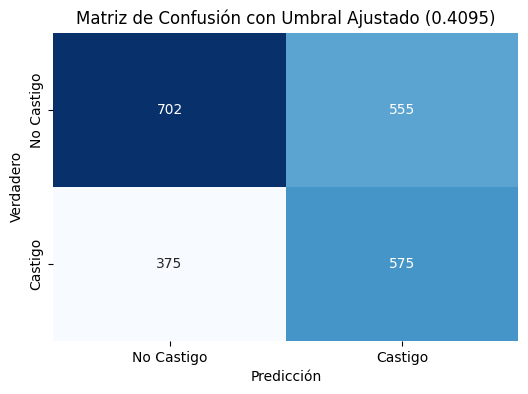

Matriz de Confusión con Umbral Ajustado:
[[702 555]
 [375 575]]


In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculamos la matriz de confusión con el umbral ajustado
conf_matrix_svm_reduced = confusion_matrix(y_test, y_pred_svm_threshold_reduced)

# Visualizamos la matriz de confusión
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix_svm_reduced, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No Castigo', 'Castigo'], yticklabels=['No Castigo', 'Castigo'])
plt.xlabel('Predicción')
plt.ylabel('Verdadero')
plt.title(f'Matriz de Confusión con Umbral Ajustado ({best_threshold_reduced:.4f})')
plt.show()

# Imprimimos la matriz de confusión en texto para referencia
print(f"Matriz de Confusión con Umbral Ajustado:\n{conf_matrix_svm_reduced}")


# KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
import numpy as np

# Definimos los valores de los hiperparámetros a probar manualmente
n_neighbors_list = [3, 5, 7, 9, 11]  # Número de vecinos
weights_list = ['uniform', 'distance']  # Pesos de los vecinos
metric = 'euclidean'  # Solo usamos la distancia Euclídea

# Inicializamos variables para almacenar los mejores resultados
best_accuracy = 0
best_params = {}

# Creamos el KFold para la validación cruzada
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Iteramos sobre todas las combinaciones de hiperparámetros
for n_neighbors in n_neighbors_list:
    for weights in weights_list:
        accuracies = []

        # Validación cruzada
        for train_index, val_index in kf.split(X):
            X_train, X_val = X.iloc[train_index], X.iloc[val_index]
            y_train, y_val = y.iloc[train_index], y.iloc[val_index]

            # Creamos el modelo KNN con los hiperparámetros actuales
            knn_model = KNeighborsClassifier(n_neighbors=n_neighbors, weights=weights, metric=metric)

            # Entrenamos el modelo
            knn_model.fit(X_train, y_train)

            # Hacemos predicciones en el conjunto de validación
            y_pred = knn_model.predict(X_val)

            # Calculamos la precisión
            accuracy = accuracy_score(y_val, y_pred)
            accuracies.append(accuracy)

        # Promediamos las precisiones de las 5 pliegues
        mean_accuracy = np.mean(accuracies)

        # Si la precisión es mejor, guardamos estos hiperparámetros
        if mean_accuracy > best_accuracy:
            best_accuracy = mean_accuracy
            best_params = {'n_neighbors': n_neighbors, 'weights': weights}

# Mostramos los mejores hiperparámetros y la mejor precisión promedio
print(f"Mejores hiperparámetros: {best_params}")
print(f"Mejor precisión promedio: {best_accuracy:.4f}")


Mejores hiperparámetros: {'n_neighbors': 9, 'weights': 'uniform'}
Mejor precisión promedio: 0.5866


In [ ]:
# Entrenamos el modelo KNN con los mejores hiperparámetros
best_knn_model = KNeighborsClassifier(n_neighbors=9, weights='uniform', metric='euclidean')

# Entrenamos el modelo en todo el conjunto de entrenamiento
best_knn_model.fit(X, y)

# Hacemos predicciones en el conjunto de prueba
y_pred_knn_test = best_knn_model.predict(X_test)

# Calculamos las métricas de evaluación en el conjunto de prueba
accuracy_knn_test = accuracy_score(y_test, y_pred_knn_test)
precision_knn_test = precision_score(y_test, y_pred_knn_test)
recall_knn_test = recall_score(y_test, y_pred_knn_test)
f1_knn_test = f1_score(y_test, y_pred_knn_test)
roc_auc_knn_test = roc_auc_score(y_test, best_knn_model.predict_proba(X_test)[:, 1])

# Mostramos las métricas de evaluación
print(f"Precisión (Accuracy) en el conjunto de prueba: {accuracy_knn_test:.4f}")
print(f"Precisión (Precision) en el conjunto de prueba: {precision_knn_test:.4f}")
print(f"Sensibilidad (Recall) en el conjunto de prueba: {recall_knn_test:.4f}")
print(f"F1 Score en el conjunto de prueba: {f1_knn_test:.4f}")
print(f"ROC AUC en el conjunto de prueba: {roc_auc_knn_test:.4f}")


Precisión (Accuracy) en el conjunto de prueba: 0.5773
Precisión (Precision) en el conjunto de prueba: 0.5133
Sensibilidad (Recall) en el conjunto de prueba: 0.3463
F1 Score en el conjunto de prueba: 0.4136
ROC AUC en el conjunto de prueba: 0.5759


In [ ]:
from sklearn.metrics import roc_curve

# Obtenemos las probabilidades para la clase positiva
y_prob_knn = best_knn_model.predict_proba(X_test)[:, 1]

# Calculamos la curva ROC y los umbrales correspondientes
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, y_prob_knn)

# Calculamos el Índice de Youden (sensibilidad + especificidad - 1)
youden_index_knn = tpr_knn - fpr_knn

# Encontramos el umbral que maximiza el Índice de Youden
best_threshold_knn = thresholds_knn[np.argmax(youden_index_knn)]

# Mostramos el umbral óptimo
print(f"El mejor umbral según el Índice de Youden es: {best_threshold_knn:.4f}")

# También mostramos la sensibilidad y especificidad correspondientes al mejor umbral
print(f"Sensibilidad en el mejor umbral: {tpr_knn[np.argmax(youden_index_knn)]:.4f}")
print(f"Especificidad en el mejor umbral: {1 - fpr_knn[np.argmax(youden_index_knn)]:.4f}")

# ---- Ajustamos las predicciones utilizando el nuevo umbral ----
y_pred_knn_threshold = (y_prob_knn >= best_threshold_knn).astype(int)

# Calculamos las métricas de evaluación con el umbral ajustado
accuracy_threshold_knn = accuracy_score(y_test, y_pred_knn_threshold)
precision_threshold_knn = precision_score(y_test, y_pred_knn_threshold)
recall_threshold_knn = recall_score(y_test, y_pred_knn_threshold)
f1_threshold_knn = f1_score(y_test, y_pred_knn_threshold)
roc_auc_threshold_knn = roc_auc_score(y_test, y_prob_knn)

# Mostramos las métricas de evaluación con el umbral ajustado
print(f"Precisión (Accuracy) con umbral ajustado: {accuracy_threshold_knn:.4f}")
print(f"Precisión (Precision) con umbral ajustado: {precision_threshold_knn:.4f}")
print(f"Sensibilidad (Recall) con umbral ajustado: {recall_threshold_knn:.4f}")
print(f"F1 Score con umbral ajustado: {f1_threshold_knn:.4f}")
print(f"ROC AUC con umbral ajustado: {roc_auc_threshold_knn:.4f}")


El mejor umbral según el Índice de Youden es: 0.4444
Sensibilidad en el mejor umbral: 0.5505
Especificidad en el mejor umbral: 0.5521
Precisión (Accuracy) con umbral ajustado: 0.5514
Precisión (Precision) con umbral ajustado: 0.4816
Sensibilidad (Recall) con umbral ajustado: 0.5505
F1 Score con umbral ajustado: 0.5138
ROC AUC con umbral ajustado: 0.5759


## KNN con las 50 mejores variables de RF

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd

# Cargamos los datasets con las 50 variables importantes
X_reduced_rf = pd.read_csv('/content/50featurestrain.csv')
X_test_reduced_rf = pd.read_csv('/content/50featurestest.csv')

# Definimos los valores de los hiperparámetros a probar
n_neighbors_list = [3, 5, 7, 9, 11]  # Número de vecinos
weights_list = ['uniform', 'distance']  # Pesos de los vecinos
metric = 'euclidean'  # Usamos solo la distancia Euclídea

# Inicializamos variables para almacenar los mejores resultados
best_accuracy = 0
best_params = {}

# Creamos el KFold para la validación cruzada
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Iteramos sobre todas las combinaciones de hiperparámetros
for n_neighbors in n_neighbors_list:
    for weights in weights_list:
        accuracies = []

        # Validación cruzada
        for train_index, val_index in kf.split(X_reduced_rf):
            X_train, X_val = X_reduced_rf.iloc[train_index], X_reduced_rf.iloc[val_index]
            y_train, y_val = y.iloc[train_index], y.iloc[val_index]

            # Creamos el modelo KNN con los hiperparámetros actuales
            knn_model = KNeighborsClassifier(n_neighbors=n_neighbors, weights=weights, metric=metric)

            # Entrenamos el modelo
            knn_model.fit(X_train, y_train)

            # Hacemos predicciones en el conjunto de validación
            y_pred = knn_model.predict(X_val)

            # Calculamos la precisión
            accuracy = accuracy_score(y_val, y_pred)
            accuracies.append(accuracy)

        # Promediamos las precisiones de las 5 pliegues
        mean_accuracy = np.mean(accuracies)

        # Si la precisión es mejor, guardamos estos hiperparámetros
        if mean_accuracy > best_accuracy:
            best_accuracy = mean_accuracy
            best_params = {'n_neighbors': n_neighbors, 'weights': weights}

# Mostramos los mejores hiperparámetros y la mejor precisión promedio
print(f"Mejores hiperparámetros: {best_params}")
print(f"Mejor precisión promedio: {best_accuracy:.4f}")


Mejores hiperparámetros: {'n_neighbors': 11, 'weights': 'uniform'}
Mejor precisión promedio: 0.5808


In [ ]:
# Entrenamos el modelo KNN con los mejores hiperparámetros
best_knn_model_reduced = KNeighborsClassifier(n_neighbors=11, weights='uniform', metric='euclidean')

# Entrenamos el modelo con las 50 variables seleccionadas
best_knn_model_reduced.fit(X_reduced_rf, y)

# Hacemos predicciones en el conjunto de prueba con las 50 variables
y_pred_knn_reduced = best_knn_model_reduced.predict(X_test_reduced_rf)

# Calculamos las métricas de evaluación en el conjunto de prueba
accuracy_knn_reduced = accuracy_score(y_test, y_pred_knn_reduced)
precision_knn_reduced = precision_score(y_test, y_pred_knn_reduced)
recall_knn_reduced = recall_score(y_test, y_pred_knn_reduced)
f1_knn_reduced = f1_score(y_test, y_pred_knn_reduced)
roc_auc_knn_reduced = roc_auc_score(y_test, best_knn_model_reduced.predict_proba(X_test_reduced_rf)[:, 1])

# Mostramos las métricas de evaluación
print(f"Precisión (Accuracy) en el conjunto de prueba con 50 variables: {accuracy_knn_reduced:.4f}")
print(f"Precisión (Precision) en el conjunto de prueba con 50 variables: {precision_knn_reduced:.4f}")
print(f"Sensibilidad (Recall) en el conjunto de prueba con 50 variables: {recall_knn_reduced:.4f}")
print(f"F1 Score en el conjunto de prueba con 50 variables: {f1_knn_reduced:.4f}")
print(f"ROC AUC en el conjunto de prueba con 50 variables: {roc_auc_knn_reduced:.4f}")


Precisión (Accuracy) en el conjunto de prueba con 50 variables: 0.5673
Precisión (Precision) en el conjunto de prueba con 50 variables: 0.4964
Sensibilidad (Recall) en el conjunto de prueba con 50 variables: 0.3611
F1 Score en el conjunto de prueba con 50 variables: 0.4180
ROC AUC en el conjunto de prueba con 50 variables: 0.5739


In [ ]:
from sklearn.metrics import roc_curve

# Obtenemos las probabilidades para la clase positiva
y_prob_knn_reduced = best_knn_model_reduced.predict_proba(X_test_reduced_rf)[:, 1]

# Calculamos la curva ROC y los umbrales correspondientes
fpr_knn_reduced, tpr_knn_reduced, thresholds_knn_reduced = roc_curve(y_test, y_prob_knn_reduced)

# Calculamos el Índice de Youden (sensibilidad + especificidad - 1)
youden_index_knn_reduced = tpr_knn_reduced - fpr_knn_reduced

# Encontramos el umbral que maximiza el Índice de Youden
best_threshold_knn_reduced = thresholds_knn_reduced[np.argmax(youden_index_knn_reduced)]

# Mostramos el umbral óptimo
print(f"El mejor umbral según el Índice de Youden es: {best_threshold_knn_reduced:.4f}")

# También mostramos la sensibilidad y especificidad correspondientes al mejor umbral
print(f"Sensibilidad en el mejor umbral: {tpr_knn_reduced[np.argmax(youden_index_knn_reduced)]:.4f}")
print(f"Especificidad en el mejor umbral: {1 - fpr_knn_reduced[np.argmax(youden_index_knn_reduced)]:.4f}")

# ---- Ajustamos las predicciones utilizando el nuevo umbral ----
y_pred_knn_reduced_threshold = (y_prob_knn_reduced >= best_threshold_knn_reduced).astype(int)

# Calculamos las métricas de evaluación con el umbral ajustado
accuracy_threshold_knn_reduced = accuracy_score(y_test, y_pred_knn_reduced_threshold)
precision_threshold_knn_reduced = precision_score(y_test, y_pred_knn_reduced_threshold)
recall_threshold_knn_reduced = recall_score(y_test, y_pred_knn_reduced_threshold)
f1_threshold_knn_reduced = f1_score(y_test, y_pred_knn_reduced_threshold)
roc_auc_threshold_knn_reduced = roc_auc_score(y_test, y_prob_knn_reduced)

# Mostramos las métricas de evaluación con el umbral ajustado
print(f"Precisión (Accuracy) con umbral ajustado: {accuracy_threshold_knn_reduced:.4f}")
print(f"Precisión (Precision) con umbral ajustado: {precision_threshold_knn_reduced:.4f}")
print(f"Sensibilidad (Recall) con umbral ajustado: {recall_threshold_knn_reduced:.4f}")
print(f"F1 Score con umbral ajustado: {f1_threshold_knn_reduced:.4f}")
print(f"ROC AUC con umbral ajustado: {roc_auc_threshold_knn_reduced:.4f}")


El mejor umbral según el Índice de Youden es: 0.4545
Sensibilidad en el mejor umbral: 0.5505
Especificidad en el mejor umbral: 0.5434
Precisión (Accuracy) con umbral ajustado: 0.5464
Precisión (Precision) con umbral ajustado: 0.4768
Sensibilidad (Recall) con umbral ajustado: 0.5505
F1 Score con umbral ajustado: 0.5110
ROC AUC con umbral ajustado: 0.5739


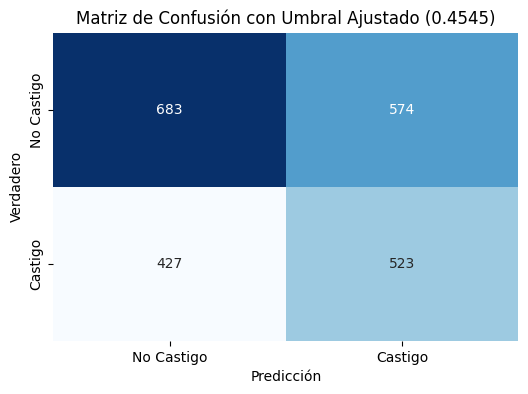

Matriz de Confusión (Umbral Ajustado):
[[683 574]
 [427 523]]


In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Ajustamos las predicciones utilizando el nuevo umbral
y_pred_knn_reduced_threshold = (y_prob_knn_reduced >= best_threshold_knn_reduced).astype(int)

# Calculamos la matriz de confusión
conf_matrix_knn_reduced = confusion_matrix(y_test, y_pred_knn_reduced_threshold)

# Visualizamos la matriz de confusión
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix_knn_reduced, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No Castigo', 'Castigo'], yticklabels=['No Castigo', 'Castigo'])
plt.xlabel('Predicción')
plt.ylabel('Verdadero')
plt.title(f'Matriz de Confusión con Umbral Ajustado ({best_threshold_knn_reduced:.4f})')
plt.show()

# También mostramos la matriz de confusión en formato de texto
print(f"Matriz de Confusión (Umbral Ajustado):\n{conf_matrix_knn_reduced}")


# Regresión Logística

In [ ]:
import pandas as pd
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import numpy as np
# Lógica del algoritmo:
# La regresión logística tiene un hiperparámetro importante, 'C', que controla la regularización.
#    Vamos a probar diferentes valores de 'C' para encontrar el mejor, desde 0.01 hasta 100.
#    Regularización: Penaliza los coeficientes del modelo para evitar el sobreajuste.
#    Un valor de 'C' más pequeño implica una regularización más fuerte (más penalización).

# Lista de valores de C que queremos probar
C_values = [0.01, 0.1, 1, 10, 100]

# Lógica de Python:
# Vamos a crear un pipeline que primero normaliza los datos con StandardScaler y luego aplica regresión logística.
# StandardScaler es útil porque la regresión logística es sensible a la escala de las características.
# Creamos una lista para almacenar los resultados de la validación cruzada.
results = []

# Lógica del algoritmo:
# Iteramos sobre los diferentes valores de C y aplicamos K-fold cross-validation para cada valor.
for C in C_values:
    # Lógica de Python:
    # Creamos un pipeline que primero escalará los datos y luego entrenará el modelo de regresión logística.
    model = make_pipeline(StandardScaler(), LogisticRegression(C=C, max_iter=1000))

    # Lógica del algoritmo:
    # Para cada modelo (con un valor distinto de C), calculamos su desempeño con K-fold cross-validation
    # cross_val_score: realiza la validación cruzada y devuelve la métrica de evaluación
    cv_results = cross_val_score(model, X, y, cv=kf, scoring='accuracy')

    # Lógica de Python:
    # Guardamos el valor de C y el promedio de la métrica de precisión en la lista 'results'
    results.append((C, np.mean(cv_results)))

    # Lógica del algoritmo:
    # Para cada valor de C, imprimimos el desempeño promedio en la validación cruzada.
    print(f"Valor de C: {C}, Precisión promedio: {np.mean(cv_results):.4f}")

# Lógica de Python:
# Encontramos el valor de C con el mejor desempeño (precisión más alta).
best_C = max(results, key=lambda x: x[1])[0]

print(f"El mejor valor de C es: {best_C}")

# Lógica del algoritmo:
# Finalmente, entrenamos el modelo definitivo con el mejor valor de C encontrado usando todo el dataset.
best_model = make_pipeline(StandardScaler(), LogisticRegression(C=best_C, max_iter=1000))

# Ajustamos el modelo definitivo usando todos los datos disponibles.
best_model.fit(X, y)

Valor de C: 0.01, Precisión promedio: 0.6445
Valor de C: 0.1, Precisión promedio: 0.6383
Valor de C: 1, Precisión promedio: 0.6346
Valor de C: 10, Precisión promedio: 0.6315
Valor de C: 100, Precisión promedio: 0.6311
El mejor valor de C es: 0.01


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(C=0.01, max_iter=1000))])

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Entrenamos el mejor modelo con el conjunto de datos completo
best_model.fit(X, y)

# Hacemos las predicciones en el conjunto de prueba
y_pred = best_model.predict(X_test)

# Calculamos las probabilidades para la curva ROC y umbrales
y_prob = best_model.predict_proba(X_test)[:, 1]

# Calculamos las métricas de evaluación
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

# Mostramos las métricas de evaluación
print(f"Precisión (Accuracy) en el conjunto de prueba: {accuracy:.4f}")
print(f"Precisión (Precision) en el conjunto de prueba: {precision:.4f}")
print(f"Sensibilidad (Recall) en el conjunto de prueba: {recall:.4f}")
print(f"F1 Score en el conjunto de prueba: {f1:.4f}")
print(f"ROC AUC en el conjunto de prueba: {roc_auc:.4f}")


Precisión (Accuracy) en el conjunto de prueba: 0.6303
Precisión (Precision) en el conjunto de prueba: 0.5933
Sensibilidad (Recall) en el conjunto de prueba: 0.4484
F1 Score en el conjunto de prueba: 0.5108
ROC AUC en el conjunto de prueba: 0.6548


In [ ]:
from sklearn.metrics import roc_curve

# Calculamos la curva ROC y los umbrales correspondientes
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calculamos el Índice de Youden (sensibilidad + especificidad - 1)
youden_index = tpr - fpr

# Encontramos el umbral que maximiza el Índice de Youden
best_threshold = thresholds[np.argmax(youden_index)]

# Mostramos el umbral óptimo
print(f"El mejor umbral según el Índice de Youden es: {best_threshold:.4f}")

# También mostramos la sensibilidad y especificidad correspondientes al mejor umbral
print(f"Sensibilidad en el mejor umbral: {tpr[np.argmax(youden_index)]:.4f}")
print(f"Especificidad en el mejor umbral: {1 - fpr[np.argmax(youden_index)]:.4f}")

# Ajustamos las predicciones utilizando el nuevo umbral
y_pred_threshold = (y_prob >= best_threshold).astype(int)

# Calculamos las métricas de evaluación con el umbral ajustado
accuracy_threshold = accuracy_score(y_test, y_pred_threshold)
precision_threshold = precision_score(y_test, y_pred_threshold)
recall_threshold = recall_score(y_test, y_pred_threshold)
f1_threshold = f1_score(y_test, y_pred_threshold)
roc_auc_threshold = roc_auc_score(y_test, y_prob)

# Mostramos las métricas de evaluación con el umbral ajustado
print(f"Precisión (Accuracy) con umbral ajustado: {accuracy_threshold:.4f}")
print(f"Precisión (Precision) con umbral ajustado: {precision_threshold:.4f}")
print(f"Sensibilidad (Recall) con umbral ajustado: {recall_threshold:.4f}")
print(f"F1 Score con umbral ajustado: {f1_threshold:.4f}")
print(f"ROC AUC con umbral ajustado: {roc_auc_threshold:.4f}")


El mejor umbral según el Índice de Youden es: 0.3934
Sensibilidad en el mejor umbral: 0.6074
Especificidad en el mejor umbral: 0.6356
Precisión (Accuracy) con umbral ajustado: 0.6235
Precisión (Precision) con umbral ajustado: 0.5575
Sensibilidad (Recall) con umbral ajustado: 0.6074
F1 Score con umbral ajustado: 0.5814
ROC AUC con umbral ajustado: 0.6548


## Regresión Logística con las 50 variables de RF

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import numpy as np

# Lista de valores de C que queremos probar
C_values = [0.01, 0.1, 1, 10, 100]

# Inicializamos KFold para la validación cruzada
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Creamos una lista para almacenar los resultados de la validación cruzada
results = []

# Iteramos sobre los diferentes valores de C y aplicamos K-fold cross-validation para cada valor
for C in C_values:
    # Creamos un pipeline que primero escalará los datos y luego entrenará el modelo de regresión logística
    model = make_pipeline(StandardScaler(), LogisticRegression(C=C, max_iter=1000))

    # Realizamos validación cruzada y guardamos los resultados de precisión
    cv_results = cross_val_score(model, X_reduced_rf, y, cv=kf, scoring='accuracy')

    # Guardamos el valor de C y el promedio de la métrica de precisión
    results.append((C, np.mean(cv_results)))

    # Imprimimos el desempeño promedio para cada valor de C
    print(f"Valor de C: {C}, Precisión promedio: {np.mean(cv_results):.4f}")

# Encontramos el valor de C con el mejor desempeño (precisión más alta)
best_C = max(results, key=lambda x: x[1])[0]

print(f"El mejor valor de C es: {best_C}")


Valor de C: 0.01, Precisión promedio: 0.6433
Valor de C: 0.1, Precisión promedio: 0.6421
Valor de C: 1, Precisión promedio: 0.6427
Valor de C: 10, Precisión promedio: 0.6427
Valor de C: 100, Precisión promedio: 0.6427
El mejor valor de C es: 0.01


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Entrenamos el modelo con las 50 mejores variables
best_model_reduced = make_pipeline(StandardScaler(), LogisticRegression(C=best_C, max_iter=1000))
best_model_reduced.fit(X_reduced_rf, y)

# Hacemos las predicciones en el conjunto de prueba
y_pred_reduced = best_model_reduced.predict(X_test_reduced_rf)

# Calculamos las probabilidades para la curva ROC
y_prob_reduced = best_model_reduced.predict_proba(X_test_reduced_rf)[:, 1]

# Calculamos las métricas de evaluación
accuracy_reduced = accuracy_score(y_test, y_pred_reduced)
precision_reduced = precision_score(y_test, y_pred_reduced)
recall_reduced = recall_score(y_test, y_pred_reduced)
f1_reduced = f1_score(y_test, y_pred_reduced)
roc_auc_reduced = roc_auc_score(y_test, y_prob_reduced)

# Mostramos las métricas de evaluación
print(f"Precisión (Accuracy) en el conjunto de prueba con 50 variables: {accuracy_reduced:.4f}")
print(f"Precisión (Precision) en el conjunto de prueba con 50 variables: {precision_reduced:.4f}")
print(f"Sensibilidad (Recall) en el conjunto de prueba con 50 variables: {recall_reduced:.4f}")
print(f"F1 Score en el conjunto de prueba con 50 variables: {f1_reduced:.4f}")
print(f"ROC AUC en el conjunto de prueba con 50 variables: {roc_auc_reduced:.4f}")


Precisión (Accuracy) en el conjunto de prueba con 50 variables: 0.6203
Precisión (Precision) en el conjunto de prueba con 50 variables: 0.6011
Sensibilidad (Recall) en el conjunto de prueba con 50 variables: 0.3505
F1 Score en el conjunto de prueba con 50 variables: 0.4428
ROC AUC en el conjunto de prueba con 50 variables: 0.6639


In [ ]:
from sklearn.metrics import roc_curve

# Calculamos la curva ROC y los umbrales correspondientes
fpr, tpr, thresholds = roc_curve(y_test, y_prob_reduced)

# Calculamos el Índice de Youden (sensibilidad + especificidad - 1)
youden_index = tpr - fpr

# Encontramos el umbral que maximiza el Índice de Youden
best_threshold_reduced = thresholds[np.argmax(youden_index)]

# Mostramos el umbral óptimo
print(f"El mejor umbral según el Índice de Youden es: {best_threshold_reduced:.4f}")

# También mostramos la sensibilidad y especificidad correspondientes al mejor umbral
print(f"Sensibilidad en el mejor umbral: {tpr[np.argmax(youden_index)]:.4f}")
print(f"Especificidad en el mejor umbral: {1 - fpr[np.argmax(youden_index)]:.4f}")

# Ajustamos las predicciones utilizando el nuevo umbral
y_pred_reduced_threshold = (y_prob_reduced >= best_threshold_reduced).astype(int)

# Calculamos las métricas de evaluación con el umbral ajustado
accuracy_reduced_threshold = accuracy_score(y_test, y_pred_reduced_threshold)
precision_reduced_threshold = precision_score(y_test, y_pred_reduced_threshold)
recall_reduced_threshold = recall_score(y_test, y_pred_reduced_threshold)
f1_reduced_threshold = f1_score(y_test, y_pred_reduced_threshold)
roc_auc_reduced_threshold = roc_auc_score(y_test, y_prob_reduced)

# Mostramos las métricas de evaluación con el umbral ajustado
print(f"Precisión (Accuracy) con umbral ajustado: {accuracy_reduced_threshold:.4f}")
print(f"Precisión (Precision) con umbral ajustado: {precision_reduced_threshold:.4f}")
print(f"Sensibilidad (Recall) con umbral ajustado: {recall_reduced_threshold:.4f}")
print(f"F1 Score con umbral ajustado: {f1_reduced_threshold:.4f}")
print(f"ROC AUC con umbral ajustado: {roc_auc_reduced_threshold:.4f}")


El mejor umbral según el Índice de Youden es: 0.3645
Sensibilidad en el mejor umbral: 0.7084
Especificidad en el mejor umbral: 0.5235
Precisión (Accuracy) con umbral ajustado: 0.6031
Precisión (Precision) con umbral ajustado: 0.5291
Sensibilidad (Recall) con umbral ajustado: 0.7084
F1 Score con umbral ajustado: 0.6058
ROC AUC con umbral ajustado: 0.6639


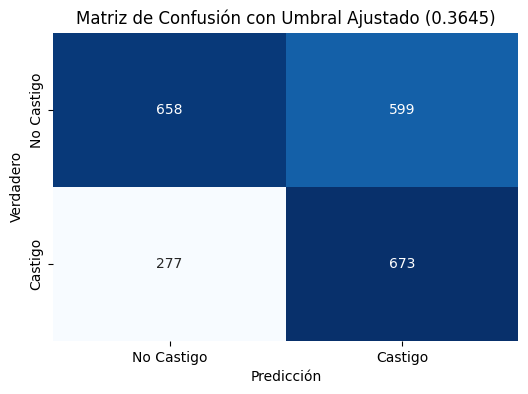

Matriz de Confusión (Umbral Ajustado):
[[658 599]
 [277 673]]


In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Ajustamos las predicciones utilizando el nuevo umbral
y_pred_reduced_threshold = (y_prob_reduced >= best_threshold_reduced).astype(int)

# Calculamos la matriz de confusión
conf_matrix_reduced = confusion_matrix(y_test, y_pred_reduced_threshold)

# Visualizamos la matriz de confusión
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix_reduced, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No Castigo', 'Castigo'], yticklabels=['No Castigo', 'Castigo'])
plt.xlabel('Predicción')
plt.ylabel('Verdadero')
plt.title(f'Matriz de Confusión con Umbral Ajustado ({best_threshold_reduced:.4f})')
plt.show()

# También mostramos la matriz de confusión en formato de texto para referencia
print(f"Matriz de Confusión (Umbral Ajustado):\n{conf_matrix_reduced}")


In [ ]:
import statsmodels.api as sm

# Reiniciamos los índices de X_reduced_rf y y para asegurar que estén alineados
X_reduced_rf_aligned = X_reduced_rf.reset_index(drop=True)
y_aligned = y.reset_index(drop=True)

# Añadir una constante (intercepto)
X_with_const = sm.add_constant(X_reduced_rf_aligned)

# Ajustar el modelo de regresión logística usando statsmodels
logit_model = sm.Logit(y_aligned, X_with_const).fit()

# Mostrar el resumen del modelo, que incluye coeficientes y p-valores
print(logit_model.summary())


Optimization terminated successfully.
         Current function value: 0.624279
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:               violence   No. Observations:                 5150
Model:                          Logit   Df Residuals:                     5099
Method:                           MLE   Df Model:                           50
Date:                Sun, 13 Oct 2024   Pseudo R-squ.:                 0.07915
Time:                        15:26:41   Log-Likelihood:                -3215.0
converged:                       True   LL-Null:                       -3491.4
Covariance Type:            nonrobust   LLR p-value:                 6.797e-86
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -0.9394      0.317     -2.965      0.003      -1.560

# Variables

In [ ]:
dic = pd.read_excel('/content/diccionario_mics.xlsx')

In [ ]:
dic = dic[['variable','description']]

In [ ]:
dic.head(15)

,variable,description
0,idhogar,Identificador de hogar
1,HH1,Número de conglomerado
2,HH2,Número de hogar
3,HH5Y,Año de la entrevista
4,HH12C,Cantidad de hogares en la vivienda
5,HH48,Cantidad de miembros del hogar
6,HH49,Número de mujeres 15 - 49 años
7,HH53,Número de cuestionarios de mujeres completados
8,HH55,Número de cuestionarios de 0 a 4 años completados
9,HH56,Número de cuestionarios de 5 a 17 completados


In [ ]:
X_reduced_rf.head()

,wscore,edad_avg,edu_adultos,HHAGE,edad_ninios_0a17,edu_padre_madre,edad_ninios_1a14,edad_ninios_5a17,varones_pct,nivel_edu_adultos,...,empleados_sum,EC5A_nadie_any,varones_otros_ad_pct,transfers_any,ninio_enfermo_ch_any,HH55,hiv_discrimination_sum,EC5B_nadie_sum_pct,ninios_5a17_sum,otros_ad_sum
0,-1.862865,15.333333,7.0,34,6.000000,7.0,6.000000,9.000000,0.000000,1.0,...,1,0,0.5,1,1,1,0,1.0,1,0
1,-1.700233,16.000000,9.0,39,8.333333,9.0,8.333333,10.500000,0.250000,3.0,...,1,0,0.5,1,0,1,0,0.0,2,0
2,-1.077795,10.833333,7.0,34,6.200000,7.0,7.750000,9.666667,0.333333,1.0,...,1,1,0.5,1,0,2,0,1.0,3,0
3,-1.883859,24.500000,0.0,38,11.000000,0.0,11.000000,11.000000,0.500000,0.0,...,1,0,0.5,1,0,0,0,0.0,1,0
4,-0.812970,15.000000,8.0,23,7.000000,8.0,7.000000,7.000000,0.500000,3.0,...,1,0,0.5,1,0,0,1,0.0,1,0


In [ ]:
# Extraemos las columnas de X_reduced_rf
columns_X_reduced_rf = pd.DataFrame(X_reduced_rf.columns, columns=['variable'])

merged_df = pd.merge(columns_X_reduced_rf, dic, on='variable', how='left')




In [ ]:
merged_df

,variable,description
0,wscore,Puntaje en índice de riqueza
1,edad_avg,Edad promedio en el hogar
2,edu_adultos,Media del nivel de educación de los adultos qu...
3,HHAGE,Edad del jefe
4,edad_ninios_0a17,Edad promedio entre los niños/as de 0 a 17 año...
5,edu_padre_madre,Media del nivel de educación de los padres/mad...
6,edad_ninios_1a14,Edad promedio entre los niños/as de 1 a 14 año...
7,edad_ninios_5a17,Edad promedio entre los niños/as de 5 a 17 año...
8,varones_pct,Porcentaje de varones en el hogar
9,nivel_edu_adultos,Media del nivel de educativo de los adultos en...
